In [1]:
!pip install opencv-python

In [2]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=a5d321bdb6e9032fd2f3d3d86e037aeac8993ba61cc2060c25282faa9d793a4e
  Stored in directory: c:\users\utsav\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [3]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Load the data

In [5]:
# re-sizing all images to 224x224 according to VGG16

IMAGE_SIZE = [224, 224]

train_path = 'img_data/train'
valid_path = 'img_data/test'

## Creating the Model

3 models we are going to build:
- VGG 16
- VGG 19
- Resnet

In [6]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 26s 0us/step


- "imagenet" weights have been used.
- false, means last layer is being eliminated
- not training the existing layers below, so specified False

In [7]:
for layer in vgg16.layers:
    layer.trainable = False
    
for layer in vgg19.layers:
    layer.trainable = False
    
for layer in resnet.layers:
    layer.trainable = False


In [8]:
## Flatten the output - converting the data into a 1d array for input to next layer

x1 = Flatten()(vgg16.output)

x2 = Flatten()(vgg19.output)

x3 = Flatten()(resnet.output)

In [33]:
#checking the folder
folder = glob(r"C:\Users\utsav\Desktop\datatrained\internship\Assignment 13\img_data\train\*")

In [35]:
len(folder)

3

In [36]:
#training prediction

pred1 = Dense(len(folder), activation='softmax')(x1)
pred2 = Dense(len(folder), activation='softmax')(x2)
pred3 = Dense(len(folder), activation='softmax')(x3)

In [37]:
##final model
#creating the object named model
model16 = Model(inputs=vgg16.input, outputs=pred1)
model19 = Model(inputs=vgg19.input, outputs=pred2)
modelres = Model(inputs=resnet.input, outputs=pred3)

### Model structure

In [38]:
print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-VGG 16-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
print(model16.summary())

print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-VGG 19-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
print(model19.summary())

print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-RESNET-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
print(modelres.summary())

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-VGG 16-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
               

 conv1_bn (BatchNormalization)  (None, 112, 112, 64  256         ['conv1_conv[0][0]']             
                                )                                                                 
                                                                                                  
 conv1_relu (Activation)        (None, 112, 112, 64  0           ['conv1_bn[0][0]']               
                                )                                                                 
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 114, 114, 64  0           ['conv1_relu[0][0]']             
                                )                                                                 
                                                                                                  
 pool1_pool (MaxPooling2D)      (None, 56, 56, 64)   0           ['pool1_pad[0][0]']              
          

                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 56, 56, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 56, 56, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_add (Add)         (None, 56, 56, 256)  0           ['conv2_block2_out[0][0]',       
                                                                  'conv2_block3_3_bn[0][0]']      
                                                                                                  
 conv2_block3_out (Activation)  (None, 56, 56, 256)  0           ['conv2_block3_add[0][0]']       
          

                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block3_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_add (Add)         (None, 28, 28, 512)  0           ['conv3_block2_out[0][0]',       
                                                                  'conv3_block3_3_bn[0][0]']      
                                                                                                  
 conv3_block3_out (Activation)  (None, 28, 28, 512)  0           ['conv3_block3_add[0][0]']       
          

                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block2_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block2_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block5_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block5_3_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 7, 7, 512)    2359808     ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
          

In [40]:
#Cost and optimization method
model16.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model19.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
modelres.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
#data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

training_set = train_datagen.flow_from_directory(r'C:\Users\utsav\Desktop\datatrained\internship\Assignment 13\img_data\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 740 images belonging to 3 classes.


In [45]:
#data augmentation
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(r'C:\Users\utsav\Desktop\datatrained\internship\Assignment 13\img_data\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 354 images belonging to 3 classes.


In [46]:
#fitting the model

model16_fit = model16.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\utsav\AppData\Local\Temp/ipykernel_15224/2865950339.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model16_fit = model16.fit_generator(


Epoch 1/25
24/24 [==============================] - 307s 13s/step - loss: 0.7216 - accuracy: 0.7270 - val_loss: 0.5812 - val_accuracy: 0.7119
Epoch 2/25
24/24 [==============================] - 320s 14s/step - loss: 0.2168 - accuracy: 0.9122 - val_loss: 0.3487 - val_accuracy: 0.8333
Epoch 3/25
24/24 [==============================] - 294s 12s/step - loss: 0.1702 - accuracy: 0.9230 - val_loss: 0.3755 - val_accuracy: 0.8305
Epoch 4/25
24/24 [==============================] - 295s 12s/step - loss: 0.1504 - accuracy: 0.9432 - val_loss: 0.3594 - val_accuracy: 0.8362
Epoch 5/25
24/24 [==============================] - 300s 13s/step - loss: 0.1385 - accuracy: 0.9405 - val_loss: 0.3231 - val_accuracy: 0.8418
Epoch 6/25
24/24 [==============================] - 296s 13s/step - loss: 0.1245 - accuracy: 0.9541 - val_loss: 0.3341 - val_accuracy: 0.8446
Epoch 7/25
24/24 [==============================] - 291s 12s/step - loss: 0.0804 - accuracy: 0.9784 - val_loss: 0.3082 - val_accuracy: 0.8814
Epoch 

KeyboardInterrupt: 

In [47]:
model19_fit = model19.fit(
  training_set,
  validation_data=test_set,
  epochs=14,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/14
24/24 [==============================] - 378s 16s/step - loss: 0.6844 - accuracy: 0.7541 - val_loss: 0.5938 - val_accuracy: 0.7119
Epoch 2/14
24/24 [==============================] - 368s 16s/step - loss: 0.2597 - accuracy: 0.9000 - val_loss: 0.4322 - val_accuracy: 0.7627
Epoch 3/14
24/24 [==============================] - 368s 16s/step - loss: 0.2233 - accuracy: 0.9000 - val_loss: 0.3449 - val_accuracy: 0.8107
Epoch 4/14
24/24 [==============================] - 373s 16s/step - loss: 0.1979 - accuracy: 0.9162 - val_loss: 0.5237 - val_accuracy: 0.7542
Epoch 5/14
24/24 [==============================] - 383s 16s/step - loss: 0.1807 - accuracy: 0.9162 - val_loss: 0.6593 - val_accuracy: 0.7542
Epoch 6/14
24/24 [==============================] - 372s 16s/step - loss: 0.1755 - accuracy: 0.9324 - val_loss: 0.3169 - val_accuracy: 0.8475
Epoch 7/14
24/24 [==============================] - 368s 16s/step - loss: 0.1132 - accuracy: 0.9608 - val_loss: 0.3152 - val_accuracy: 0.8418
Epoch 

KeyboardInterrupt: 

In [48]:
modelres_fit = modelres.fit(
  training_set,
  validation_data=test_set,
  epochs=12,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/12
24/24 [==============================] - 115s 5s/step - loss: 4.2542 - accuracy: 0.4743 - val_loss: 0.9380 - val_accuracy: 0.6582
Epoch 2/12
24/24 [==============================] - 106s 5s/step - loss: 0.7051 - accuracy: 0.6824 - val_loss: 0.6189 - val_accuracy: 0.7203
Epoch 3/12
24/24 [==============================] - 107s 5s/step - loss: 0.4933 - accuracy: 0.7581 - val_loss: 0.8132 - val_accuracy: 0.6780
Epoch 4/12
24/24 [==============================] - 107s 4s/step - loss: 0.4873 - accuracy: 0.7662 - val_loss: 0.7567 - val_accuracy: 0.6751
Epoch 5/12
24/24 [==============================] - 106s 4s/step - loss: 0.5751 - accuracy: 0.7581 - val_loss: 0.6943 - val_accuracy: 0.7260
Epoch 6/12
24/24 [==============================] - 107s 4s/step - loss: 0.5578 - accuracy: 0.7541 - val_loss: 1.3136 - val_accuracy: 0.6384
Epoch 7/12
24/24 [==============================] - 108s 5s/step - loss: 0.9289 - accuracy: 0.7216 - val_loss: 1.8923 - val_accuracy: 0.6384
Epoch 8/12
24

In [49]:
losses_vgg16=pd.DataFrame(model16.history.history)
print("xxxxxxxxxxxxxxxxxxxxxxxxVGG16xxxxxxxxxxxxxxxxxxxx\n",losses_vgg16)

xxxxxxxxxxxxxxxxxxxxxxxxVGG16xxxxxxxxxxxxxxxxxxxx
         loss  accuracy  val_loss  val_accuracy
0   0.721584  0.727027  0.581177      0.711864
1   0.216846  0.912162  0.348703      0.833333
2   0.170201  0.922973  0.375484      0.830508
3   0.150432  0.943243  0.359378      0.836158
4   0.138532  0.940541  0.323054      0.841808
5   0.124534  0.954054  0.334133      0.844633
6   0.080384  0.978378  0.308177      0.881356
7   0.072674  0.985135  0.344923      0.844633
8   0.080672  0.968919  0.378730      0.813559
9   0.087950  0.968919  0.333160      0.864407
10  0.071720  0.974324  0.361623      0.855932
11  0.079264  0.981081  0.336446      0.855932
12  0.073109  0.966216  0.341709      0.850282


In [50]:
losses_vgg19=pd.DataFrame(model19.history.history)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxVGG19xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n",losses_vgg19)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxVGG19xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
         loss  accuracy  val_loss  val_accuracy
0   0.684355  0.754054  0.593821      0.711864
1   0.259729  0.900000  0.432190      0.762712
2   0.223339  0.900000  0.344851      0.810734
3   0.197906  0.916216  0.523718      0.754237
4   0.180691  0.916216  0.659272      0.754237
5   0.175456  0.932432  0.316897      0.847458
6   0.113237  0.960811  0.315191      0.841808
7   0.099048  0.970270  0.333315      0.838983
8   0.093219  0.975676  0.375162      0.816384
9   0.092811  0.970270  0.369587      0.813559
10  0.084052  0.971622  0.328204      0.838983


In [51]:
losses_resnet=pd.DataFrame(modelres.history.history)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx RESNET xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n",losses_resnet)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx RESNET xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
         loss  accuracy  val_loss  val_accuracy
0   4.254151  0.474324  0.937988      0.658192
1   0.705145  0.682432  0.618894      0.720339
2   0.493293  0.758108  0.813201      0.677966
3   0.487345  0.766216  0.756663      0.675141
4   0.575057  0.758108  0.694250      0.725989
5   0.557797  0.754054  1.313641      0.638418
6   0.928897  0.721622  1.892271      0.638418
7   0.777449  0.732432  0.691914      0.700565
8   0.669376  0.771622  1.070720      0.632768
9   0.557235  0.789189  1.074323      0.646893
10  0.881386  0.736486  0.768388      0.728814
11  0.586019  0.793243  0.733242      0.748588


In [52]:
# Accuracy

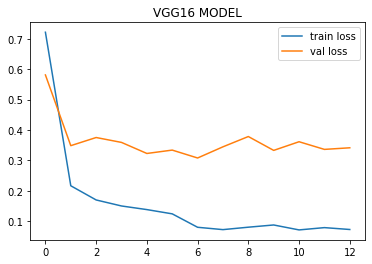

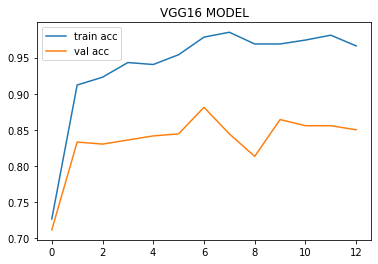

<Figure size 432x288 with 0 Axes>

In [58]:
# plot the loss

plt.plot(model16.history.history['loss'], label='train loss')
plt.plot(model16.history.history['val_loss'], label='val loss')
plt.legend()
plt.title("VGG16 MODEL")
plt.show()
plt.savefig('Loss-Val_loss')

# plot the accuracy
plt.plot(losses_vgg16['accuracy'], label='train acc')
plt.plot(losses_vgg16['val_accuracy'], label='val acc')
plt.legend()
plt.title("VGG16 MODEL")
plt.show()
plt.savefig('Acc-Val_acc')

__We chose to plot the graph for VGG16 model because the average val_accuracy is 83+% which is the best among all the models__

In [57]:
labels_df = pd.DataFrame(list(training_set.class_indices.items()),columns = ['Categories','labels'],index=None)
labels_df

,Categories,labels
0,jeans,0
1,saree,1
2,trousers,2


## Predictions

In [59]:
# path to the train and test directory
train_path = r'C:\Users\utsav\Desktop\datatrained\internship\Assignment 13\img_data\train'
test_path = r'C:\Users\utsav\Desktop\datatrained\internship\Assignment 13\img_data\test'
train_files = glob(train_path + "/*/*.jpg")
test_files = glob(test_path + "/*/*.jpg")

In [64]:
#predicting any random image
import numpy as np
from keras.preprocessing import image


def predict_random_image():
    img = image.load_img(np.random.choice(test_files), target_size=IMAGE_SIZE)
    x = image.img_to_array(img)
    plt.imshow(img)
    x = np.expand_dims(x, axis=0) /255.0
    result_df = pd.DataFrame(list(model16.predict(x)[0]),index=labels_df.Categories.values,columns=['result'])
    print(result_df.result.idxmax())

trousers


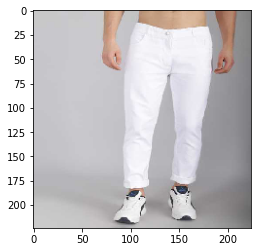

In [65]:
predict_random_image()

trousers


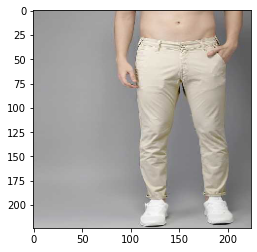

In [66]:
predict_random_image()

saree


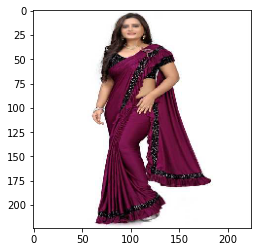

In [67]:
predict_random_image()

trousers


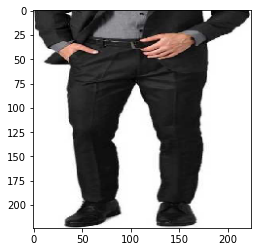

In [68]:
predict_random_image()

jeans


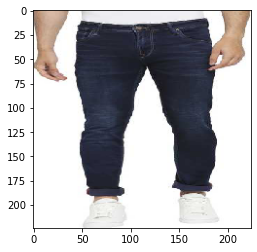

In [69]:
predict_random_image()

__The model is predicting the categories properly.__